In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [44]:
import tensorflow as tf

We are going to use a convolutional neural network with 3 layers.

(conv2d+relu+maxPooling)-->(conv2D+relu+maxPooling)---> (flatten to a fully connected layer with softmax regressor)


In [45]:
#defining placeholders
X=tf.placeholder(tf.float32,shape=(None,784))
Y_=tf.placeholder(tf.float32,shape=[None,10]) #one hot vectors

In [46]:
#defining helper functions for conv2d and max_pooling
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

def max_pooling(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [47]:
#defining helper functions for weights and bias
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [48]:
w1=weight_variable([5,5,1,32])
b1=bias_variable([32])
#now reshaping images from a image_count*784 vector to image_count*28*28*1
X_image=tf.reshape(X,[-1,28,28,1])

h_conv1=tf.nn.relu(conv2d(X_image,w1)+b1)
h_pool1=max_pooling(h_conv1)

Now we are going to define 2nd layer of cnn<br>
input=> (14x14x32)<br>
convolutional matrix=> (5x5x1)<br>
output channels=> 64<br>
resulting matrix => 14x14x64<br>

Followed by adding some non linearity with relu activation fn<br>

then finally max_pooling by ksize=2 <br>
output matrix=> 7x7x64<br>

In [49]:
w2=weight_variable([5,5,32,64])
b2=bias_variable([64])
h_conv2=tf.nn.relu(conv2d(h_pool1,w2)+b2)
h_pool2=max_pooling(h_conv2)

Now image size has been reduced to 7x7.
We are going to use a fully connected layer with 1024 neurons.
We reshape the tensor from the pooling layer into a batch of vectors, multiply by a weight matrix, add a bias, and apply a ReLU.

In [50]:
h_pool_flat=tf.reshape(h_pool2,[-1,7*7*64])
w3=weight_variable([7*7*64,1024])
b3=bias_variable([1024])

h_fc1 = tf.nn.relu(tf.matmul(h_pool_flat,w3)+b3)

Now finally we are defining our final layer using softmax classifier

In [51]:
w4=weight_variable([1024,10])
b4=bias_variable([10])
y_conv= tf.matmul(h_fc1,w4)+b4

In [52]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=Y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Now before running  the models it's time to preprocess our dataframe

In [53]:
#function to shuffel training set 
#return train_features and tran_labels(as one-hot vector)
import sklearn.preprocessing
from sklearn.utils import shuffle
def randomshuffle(train):
    #np.random.shuffle(train)
    train=shuffle(train)
    train_features=train.iloc[:,1:]
    train_labels=train.iloc[:,0]
    
    a = np.array(train_labels)
    label_binarizer = sklearn.preprocessing.LabelBinarizer()
    label_binarizer.fit(range(max(a)+1))
    b = label_binarizer.transform(a)
    train_labels=b
    return train_features,train_labels


In [54]:
#importing and preprocessing data frames
dataframe= pd.read_csv('./datasets/train.csv')
from sklearn.model_selection import train_test_split as tts
train, test=tts(dataframe,test_size=0.05,random_state=1)


Now it's time to train our models    

In [55]:
train_features,train_labels=randomshuffle(train)
print(len(train_labels),len(train_features))

39900 39900


In [56]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

import matplotlib.pyplot as plt

now entering training
on minibatch iteration  0
on minibatch iteration  100
on minibatch iteration  200
on minibatch iteration  300
0.522601667297
iteration=  0
on minibatch iteration  0
on minibatch iteration  100
on minibatch iteration  200
on minibatch iteration  300
0.11061628527
iteration=  1
on minibatch iteration  0
on minibatch iteration  100
on minibatch iteration  200
on minibatch iteration  300
0.0753317512105
iteration=  2
on minibatch iteration  0
on minibatch iteration  100
on minibatch iteration  200
on minibatch iteration  300
0.0565326281725
iteration=  3
on minibatch iteration  0
on minibatch iteration  100
on minibatch iteration  200
on minibatch iteration  300
0.043300724076
iteration=  4
on minibatch iteration  0
on minibatch iteration  100
on minibatch iteration  200
on minibatch iteration  300
0.0356745996902
iteration=  5
on minibatch iteration  0
on minibatch iteration  100
on minibatch iteration  200
on minibatch iteration  300
0.0294724098444
iteration=  6
on

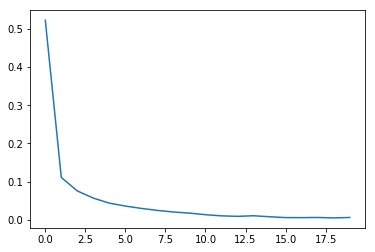

In [57]:
print("now entering training")
costs=[]
for i in range (20):   
    j=0
    train_features,train_labels=randomshuffle(train)
    batch_cost=0
    for j in range (399):
        batch_x=train_features.iloc[(j%400)*100:((j+1)%400)*100,:]/255
        batch_y=train_labels[(j%400)*100:((j+1)%400)*100,:]
        _,cost_batch=sess.run([train_step,cross_entropy],{X:batch_x,Y_:batch_y})
        batch_cost+=cost_batch/399.0   
        if j==398:
            costs.append(batch_cost)
            print(batch_cost)
        if j%100==0:
            print('on minibatch iteration ',j)
    #_x.append(i)  
    #costs.append(float(cost))
    #if i%5==0:
    print("iteration= ",i)
    #print(cost,costs)
plt.plot(costs)
plt.show()

In [59]:
test_features,test_labels=randomshuffle(test)

In [60]:
print(sess.run(accuracy,{X:test_features,Y_:test_labels}))

0.983333


In [61]:
test_set=pd.read_csv('./datasets/test.csv')

In [62]:
print(len(test_set))

28000


In [63]:
test_result=[]
for i in range(280):
    df1=test_set.iloc[i*100:(i+1)*100,:]/255
    ans=tf.argmax(y_conv, 1)
    y1,pred=sess.run([y_conv,ans],{X:df1})
    for j in range(len(pred)):
        test_result.append(pred[j])
print(len(test_result))

28000


In [64]:

test_result=np.array(test_result)

In [65]:
labels=[]
for x in range (1,28001):
    labels.append(x)
labels=np.array(labels)

In [66]:
df={
    'ImageId':labels,
    'Label':test_result
}
print(len(labels),len(test_result))
pd_df=pd.DataFrame(data=df)
pd_df.to_csv('cnn_regularized.csv',index=False)

28000 28000
